```
pip install scikit-learn
```

In [67]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from plotnine import *
import plotnine as p9
import re
from scrapy import Selector
import requests as requests
import json
import statsmodels.api as sm
import spotipy
import base64
from requests import post
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime
from sklearn import *
from base64 import *

In [68]:
merged_df = pd.read_csv('../data/merged.csv')

In [69]:
merged_df.head()

,Unnamed: 0,video_id,title,channel_id,channel_title,description,like_count,view_count,comment_count,wikipedia_categories
0,0,kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,UCLp8RBhQHu9wSsq62j_Md6A,LuisFonsiVEVO,Despacito” disponible ya en todas las platafor...,52536208,8327497494,4228228,"['https://en.wikipedia.org/wiki/Music', 'https..."
1,1,JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,The official music video for Ed Sheeran - Shap...,32323299,6149151955,1146136,"['https://en.wikipedia.org/wiki/Music', 'https..."
2,2,RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,UCLxOm-UQ1gtyQgfz8Rn34iQ,Wiz Khalifa Music,Download the new Furious 7 Soundtrack Deluxe V...,42261942,6108729902,2177000,['https://en.wikipedia.org/wiki/Hip_hop_music'...
3,3,OPf0YbXqDm0,Mark Ronson - Uptown Funk (Official Video) ft....,UCmfFGTSsfJVu6CGvL8r75qg,MarkRonsonVEVO,Official Video for Uptown Funk by Mark Ronson ...,21086264,5098360660,605169,['https://en.wikipedia.org/wiki/Hip_hop_music'...
4,4,09R8_2nJtjg,Maroon 5 - Sugar (Official Music Video),UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,Buy Sugar on iTunes: http://smarturl.it/M5V Si...,15906928,3972703093,418290,"['https://en.wikipedia.org/wiki/Music', 'https..."


In [70]:
def extract_artist_and_song(string):

    pattern_in_brackets = re.compile(r'\[.*?\]')
    pattern_in_parentheses = re.compile(r'\(.*?\)')

    string = re.sub(pattern_in_brackets, '', string)
    string = re.sub(pattern_in_parentheses, '', string)

    if '-' not in string:
        return 'None'
    if '-' in string:
        artist, song = string.split(' - ', 1)

    return [artist.strip(), song.strip()]

In [71]:
new_merge = merged_df

new_merge['Artist'] = merged_df['title'].apply(lambda x: extract_artist_and_song(x)[0])
new_merge['Song'] = merged_df['title'].apply(lambda x: extract_artist_and_song(x)[1])

new_merge.head()

,Unnamed: 0,video_id,title,channel_id,channel_title,description,like_count,view_count,comment_count,wikipedia_categories,Artist,Song
0,0,kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,UCLp8RBhQHu9wSsq62j_Md6A,LuisFonsiVEVO,Despacito” disponible ya en todas las platafor...,52536208,8327497494,4228228,"['https://en.wikipedia.org/wiki/Music', 'https...",Luis Fonsi,Despacito ft. Daddy Yankee
1,1,JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,The official music video for Ed Sheeran - Shap...,32323299,6149151955,1146136,"['https://en.wikipedia.org/wiki/Music', 'https...",Ed Sheeran,Shape of You
2,2,RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,UCLxOm-UQ1gtyQgfz8Rn34iQ,Wiz Khalifa Music,Download the new Furious 7 Soundtrack Deluxe V...,42261942,6108729902,2177000,['https://en.wikipedia.org/wiki/Hip_hop_music'...,Wiz Khalifa,See You Again ft. Charlie Puth Furious 7 Soun...
3,3,OPf0YbXqDm0,Mark Ronson - Uptown Funk (Official Video) ft....,UCmfFGTSsfJVu6CGvL8r75qg,MarkRonsonVEVO,Official Video for Uptown Funk by Mark Ronson ...,21086264,5098360660,605169,['https://en.wikipedia.org/wiki/Hip_hop_music'...,Mark Ronson,Uptown Funk ft. Bruno Mars
4,4,09R8_2nJtjg,Maroon 5 - Sugar (Official Music Video),UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,Buy Sugar on iTunes: http://smarturl.it/M5V Si...,15906928,3972703093,418290,"['https://en.wikipedia.org/wiki/Music', 'https...",Maroon 5,Sugar


In [72]:
def generate_song_url(song_artist, song_title):
    '''
    Returns a string of the URL for the Genius page of the song

        Parameters:
            song_artist (str): The artist of the song
            song_title (str): The title of the song

        Returns:
            song_url (str): The URL for the Genius page of the song
    '''
    
    base_url = 'https://genius.com/'
    
    # format the artist name and song title
    song_artist = song_artist.replace('&', 'and')
    formatted_artist = song_artist.lower().replace(' ', '-')
    formatted_title = song_title.lower().replace(' ', '-')
    
    # generate the song URL by concatenating strings according to Genius formatting
    song_url = f'{base_url}{formatted_artist}-{formatted_title}-lyrics'

    return song_url

In [73]:
new_merge['Genius_URL'] = new_merge.apply(lambda row: generate_song_url(row['Artist'], row['Song']), axis=1)

new_merge.head()

,Unnamed: 0,video_id,title,channel_id,channel_title,description,like_count,view_count,comment_count,wikipedia_categories,Artist,Song,Genius_URL
0,0,kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,UCLp8RBhQHu9wSsq62j_Md6A,LuisFonsiVEVO,Despacito” disponible ya en todas las platafor...,52536208,8327497494,4228228,"['https://en.wikipedia.org/wiki/Music', 'https...",Luis Fonsi,Despacito ft. Daddy Yankee,https://genius.com/luis-fonsi-despacito-ft.-da...
1,1,JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,The official music video for Ed Sheeran - Shap...,32323299,6149151955,1146136,"['https://en.wikipedia.org/wiki/Music', 'https...",Ed Sheeran,Shape of You,https://genius.com/ed-sheeran-shape-of-you-lyrics
2,2,RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,UCLxOm-UQ1gtyQgfz8Rn34iQ,Wiz Khalifa Music,Download the new Furious 7 Soundtrack Deluxe V...,42261942,6108729902,2177000,['https://en.wikipedia.org/wiki/Hip_hop_music'...,Wiz Khalifa,See You Again ft. Charlie Puth Furious 7 Soun...,https://genius.com/wiz-khalifa-see-you-again-f...
3,3,OPf0YbXqDm0,Mark Ronson - Uptown Funk (Official Video) ft....,UCmfFGTSsfJVu6CGvL8r75qg,MarkRonsonVEVO,Official Video for Uptown Funk by Mark Ronson ...,21086264,5098360660,605169,['https://en.wikipedia.org/wiki/Hip_hop_music'...,Mark Ronson,Uptown Funk ft. Bruno Mars,https://genius.com/mark-ronson-uptown-funk--ft...
4,4,09R8_2nJtjg,Maroon 5 - Sugar (Official Music Video),UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,Buy Sugar on iTunes: http://smarturl.it/M5V Si...,15906928,3972703093,418290,"['https://en.wikipedia.org/wiki/Music', 'https...",Maroon 5,Sugar,https://genius.com/maroon-5-sugar-lyrics


In [74]:
def scrape_lyrics(session, song_url):
    '''
    Returns a string of song lyrics, with each line separated by a new line

        Parameters:
            session (variable): The session that has been initialised for requesting from the Genius website
            song_url (str): The URL of the Genius page for the song

        Returns:
            lyrics (str): The lyrics of the song
    '''
    
    # use initialised session to enhance performance
    response = session.get(song_url)
    sel = Selector(text=response.text)
    
    # scrape lyrics into one large string
    raw_lyrics = ' '.join(sel.css('div.Lyrics__Container-sc-1ynbvzw-1.kUgSbL ::text').getall())

    # clean lyrics using regular expression to remove words in square brackets
    pattern = r'\[.*?\]'
    result_string = re.sub(pattern, '', raw_lyrics)
    lyrics = ' '.join(result_string.split())

    return lyrics

In [75]:
credentials_file_path = "../credentials.json"

with open(credentials_file_path, "r") as f:
    credentials = json.load(f)

In [76]:
my_session = requests.Session()

In [77]:
my_session.get('https://genius.com/ed-sheeran-shape-of-you-lyrics')

<Response [200]>

In [78]:
new_merge['lyrics'] = new_merge.apply(lambda row: scrape_lyrics(my_session, row['Genius_URL']), axis=1)

new_merge.head()

,Unnamed: 0,video_id,title,channel_id,channel_title,description,like_count,view_count,comment_count,wikipedia_categories,Artist,Song,Genius_URL,lyrics
0,0,kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,UCLp8RBhQHu9wSsq62j_Md6A,LuisFonsiVEVO,Despacito” disponible ya en todas las platafor...,52536208,8327497494,4228228,"['https://en.wikipedia.org/wiki/Music', 'https...",Luis Fonsi,Despacito ft. Daddy Yankee,https://genius.com/luis-fonsi-despacito-ft.-da...,
1,1,JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,The official music video for Ed Sheeran - Shap...,32323299,6149151955,1146136,"['https://en.wikipedia.org/wiki/Music', 'https...",Ed Sheeran,Shape of You,https://genius.com/ed-sheeran-shape-of-you-lyrics,A club isn't the best place to find a lover So...
2,2,RgKAFK5djSk,Wiz Khalifa - See You Again ft. Charlie Puth [...,UCLxOm-UQ1gtyQgfz8Rn34iQ,Wiz Khalifa Music,Download the new Furious 7 Soundtrack Deluxe V...,42261942,6108729902,2177000,['https://en.wikipedia.org/wiki/Hip_hop_music'...,Wiz Khalifa,See You Again ft. Charlie Puth Furious 7 Soun...,https://genius.com/wiz-khalifa-see-you-again-f...,
3,3,OPf0YbXqDm0,Mark Ronson - Uptown Funk (Official Video) ft....,UCmfFGTSsfJVu6CGvL8r75qg,MarkRonsonVEVO,Official Video for Uptown Funk by Mark Ronson ...,21086264,5098360660,605169,['https://en.wikipedia.org/wiki/Hip_hop_music'...,Mark Ronson,Uptown Funk ft. Bruno Mars,https://genius.com/mark-ronson-uptown-funk--ft...,
4,4,09R8_2nJtjg,Maroon 5 - Sugar (Official Music Video),UCN1hnUccO4FD5WfM7ithXaw,Maroon5VEVO,Buy Sugar on iTunes: http://smarturl.it/M5V Si...,15906928,3972703093,418290,"['https://en.wikipedia.org/wiki/Music', 'https...",Maroon 5,Sugar,https://genius.com/maroon-5-sugar-lyrics,"I'm hurting, baby, I'm broken down I need your..."


In [79]:
new_merge2 = new_merge.dropna()

df = new_merge2[['Artist', 'Song', 'like_count', 'view_count', 'comment_count', 'lyrics']].dropna().drop_duplicates(subset = ['Song'])

df = df[df['lyrics'] != '']

df.head()

,Artist,Song,like_count,view_count,comment_count,lyrics
1,Ed Sheeran,Shape of You,32323299,6149151955,1146136,A club isn't the best place to find a lover So...
4,Maroon 5,Sugar,15906928,3972703093,418290,"I'm hurting, baby, I'm broken down I need your..."
5,OneRepublic,Counting Stars,17490906,3927278630,488707,"Lately, I've been, I've been losin' sleep Drea..."
6,Katy Perry,Roar,16595850,3918599134,774322,I used to bite my tongue and hold my breath Sc...
8,Justin Bieber,Sorry,16306693,3741548245,868546,You gotta go and get angry at all of my honest...


In [80]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(lyric):
    scores = sid.polarity_scores(lyric)
    list = [scores['neg'], scores['neu'], scores['pos'], scores['compound']]
    return list

In [81]:
df['sentiment_positive'] = df['lyrics'].apply(lambda x: get_sentiment_score(x)[2])
df['sentiment_neutral'] = df['lyrics'].apply(lambda x: get_sentiment_score(x)[1])
df['sentiment_negative'] = df['lyrics'].apply(lambda x: get_sentiment_score(x)[0])
df['sentiment_compound'] = df['lyrics'].apply(lambda x: get_sentiment_score(x)[3])

df.head()

,Artist,Song,like_count,view_count,comment_count,lyrics,sentiment_positive,sentiment_neutral,sentiment_negative,sentiment_compound
1,Ed Sheeran,Shape of You,32323299,6149151955,1146136,A club isn't the best place to find a lover So...,0.229,0.757,0.014,0.9995
4,Maroon 5,Sugar,15906928,3972703093,418290,"I'm hurting, baby, I'm broken down I need your...",0.288,0.642,0.070,0.9988
5,OneRepublic,Counting Stars,17490906,3927278630,488707,"Lately, I've been, I've been losin' sleep Drea...",0.040,0.856,0.104,-0.9831
6,Katy Perry,Roar,16595850,3918599134,774322,I used to bite my tongue and hold my breath Sc...,0.175,0.779,0.047,0.9945
8,Justin Bieber,Sorry,16306693,3741548245,868546,You gotta go and get angry at all of my honest...,0.133,0.723,0.145,0.9039


In [82]:
def get_lexical_richness(lyric):
    total_words = len(lyric.split())
    unique_words = len(set(lyric.split()))
    lexical_richness = unique_words/total_words*100
    return round(lexical_richness)

In [83]:
df['lexical_richness'] = df['lyrics'].apply(lambda x: get_lexical_richness(x))

df.head()

,Artist,Song,like_count,view_count,comment_count,lyrics,sentiment_positive,sentiment_neutral,sentiment_negative,sentiment_compound,lexical_richness
1,Ed Sheeran,Shape of You,32323299,6149151955,1146136,A club isn't the best place to find a lover So...,0.229,0.757,0.014,0.9995,23
4,Maroon 5,Sugar,15906928,3972703093,418290,"I'm hurting, baby, I'm broken down I need your...",0.288,0.642,0.070,0.9988,29
5,OneRepublic,Counting Stars,17490906,3927278630,488707,"Lately, I've been, I've been losin' sleep Drea...",0.040,0.856,0.104,-0.9831,21
6,Katy Perry,Roar,16595850,3918599134,774322,I used to bite my tongue and hold my breath Sc...,0.175,0.779,0.047,0.9945,31
8,Justin Bieber,Sorry,16306693,3741548245,868546,You gotta go and get angry at all of my honest...,0.133,0.723,0.145,0.9039,35


In [84]:
df['song_length'] = df['lyrics'].apply(lambda x: len(x.split()))

df.head()

,Artist,Song,like_count,view_count,comment_count,lyrics,sentiment_positive,sentiment_neutral,sentiment_negative,sentiment_compound,lexical_richness,song_length
1,Ed Sheeran,Shape of You,32323299,6149151955,1146136,A club isn't the best place to find a lover So...,0.229,0.757,0.014,0.9995,23,699
4,Maroon 5,Sugar,15906928,3972703093,418290,"I'm hurting, baby, I'm broken down I need your...",0.288,0.642,0.070,0.9988,29,472
5,OneRepublic,Counting Stars,17490906,3927278630,488707,"Lately, I've been, I've been losin' sleep Drea...",0.040,0.856,0.104,-0.9831,21,517
6,Katy Perry,Roar,16595850,3918599134,774322,I used to bite my tongue and hold my breath Sc...,0.175,0.779,0.047,0.9945,31,352
8,Justin Bieber,Sorry,16306693,3741548245,868546,You gotta go and get angry at all of my honest...,0.133,0.723,0.145,0.9039,35,359


In [86]:
df['sentiment_compound_absolute'] = df['sentiment_compound'].abs()

df.head()

,Artist,Song,like_count,view_count,comment_count,lyrics,sentiment_positive,sentiment_neutral,sentiment_negative,sentiment_compound,lexical_richness,song_length,sentiment_compound_absolute
1,Ed Sheeran,Shape of You,32323299,6149151955,1146136,A club isn't the best place to find a lover So...,0.229,0.757,0.014,0.9995,23,699,0.9995
4,Maroon 5,Sugar,15906928,3972703093,418290,"I'm hurting, baby, I'm broken down I need your...",0.288,0.642,0.070,0.9988,29,472,0.9988
5,OneRepublic,Counting Stars,17490906,3927278630,488707,"Lately, I've been, I've been losin' sleep Drea...",0.040,0.856,0.104,-0.9831,21,517,0.9831
6,Katy Perry,Roar,16595850,3918599134,774322,I used to bite my tongue and hold my breath Sc...,0.175,0.779,0.047,0.9945,31,352,0.9945
8,Justin Bieber,Sorry,16306693,3741548245,868546,You gotta go and get angry at all of my honest...,0.133,0.723,0.145,0.9039,35,359,0.9039


In [87]:
corr_df = df[['like_count','view_count','comment_count', 'sentiment_positive', 'sentiment_neutral', 'sentiment_negative', 'sentiment_compound_absolute', 'lexical_richness', 'song_length']].corr()

In [88]:
corr_df2 = corr_df. \
        melt(ignore_index=False) \
        .reset_index()

corr_df2['rounded_value'] = corr_df2['value'].apply(lambda x: np.round(x, 2))

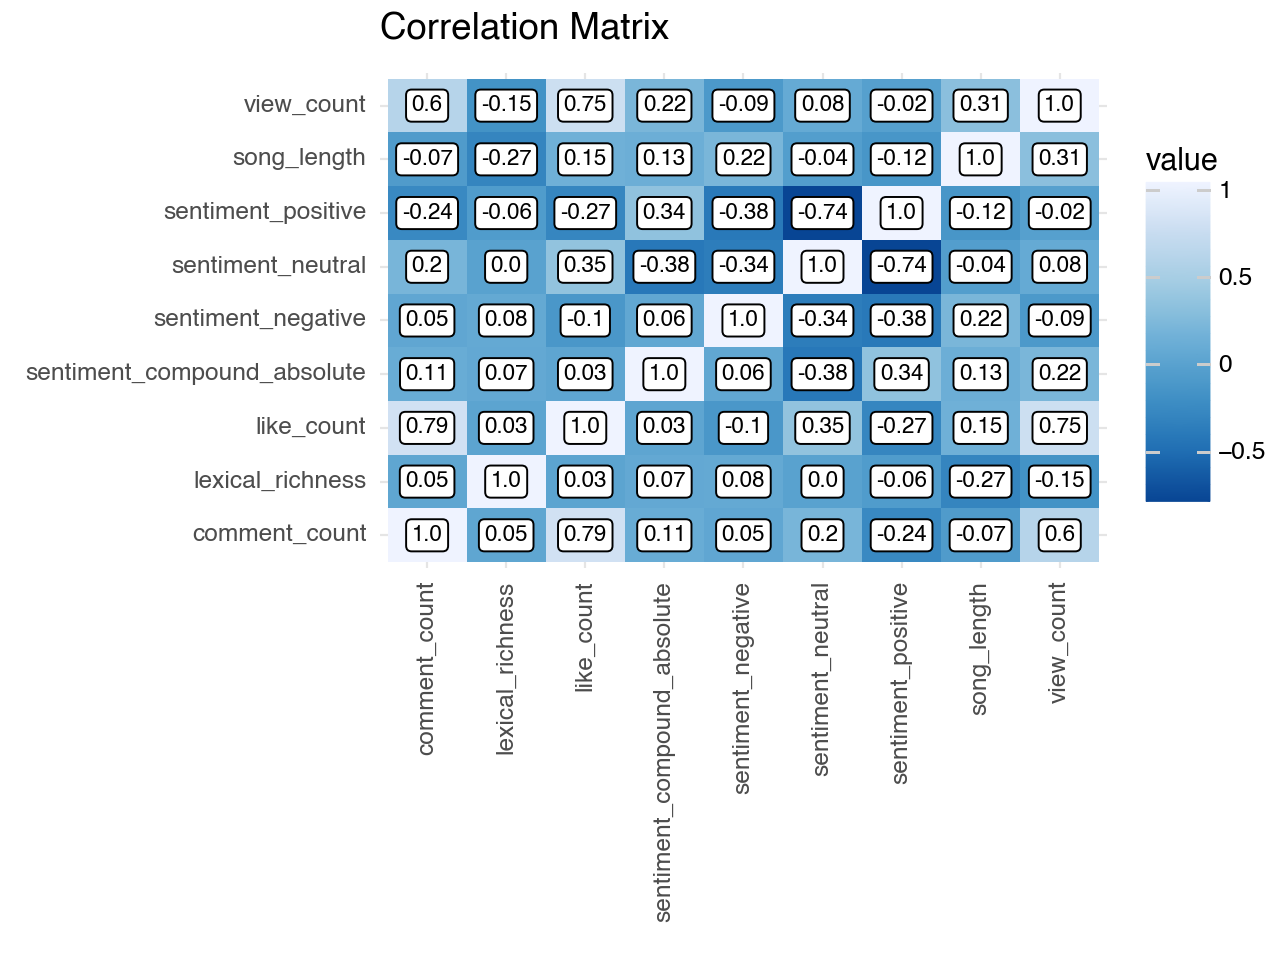

<Figure Size: (640 x 480)>

In [89]:
g = p9.ggplot(
        mapping = p9.aes('index', 'variable', fill = 'value'),
        data = corr_df2
    ) + \
        p9.geom_tile() + \
        p9.geom_label(
            p9.aes(label = 'rounded_value'),
            fill = 'white',
            size = 8
        ) + \
        p9.scale_fill_distiller() + \
        p9.theme_minimal() + \
        p9.labs(
            title = 'Correlation Matrix',
            x = '',
            y = ''
        ) + \
        p9.theme(
            axis_text_x = element_text(angle = 90)
        )

g

In [90]:
X = df[['view_count', 'comment_count', 'lexical_richness', 'sentiment_compound_absolute', 'song_length']]
Y = df['like_count']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             like_count   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     14.51
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           2.44e-06
Time:                        13:25:23   Log-Likelihood:                -451.15
No. Observations:                  28   AIC:                             914.3
Df Residuals:                      22   BIC:                             922.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

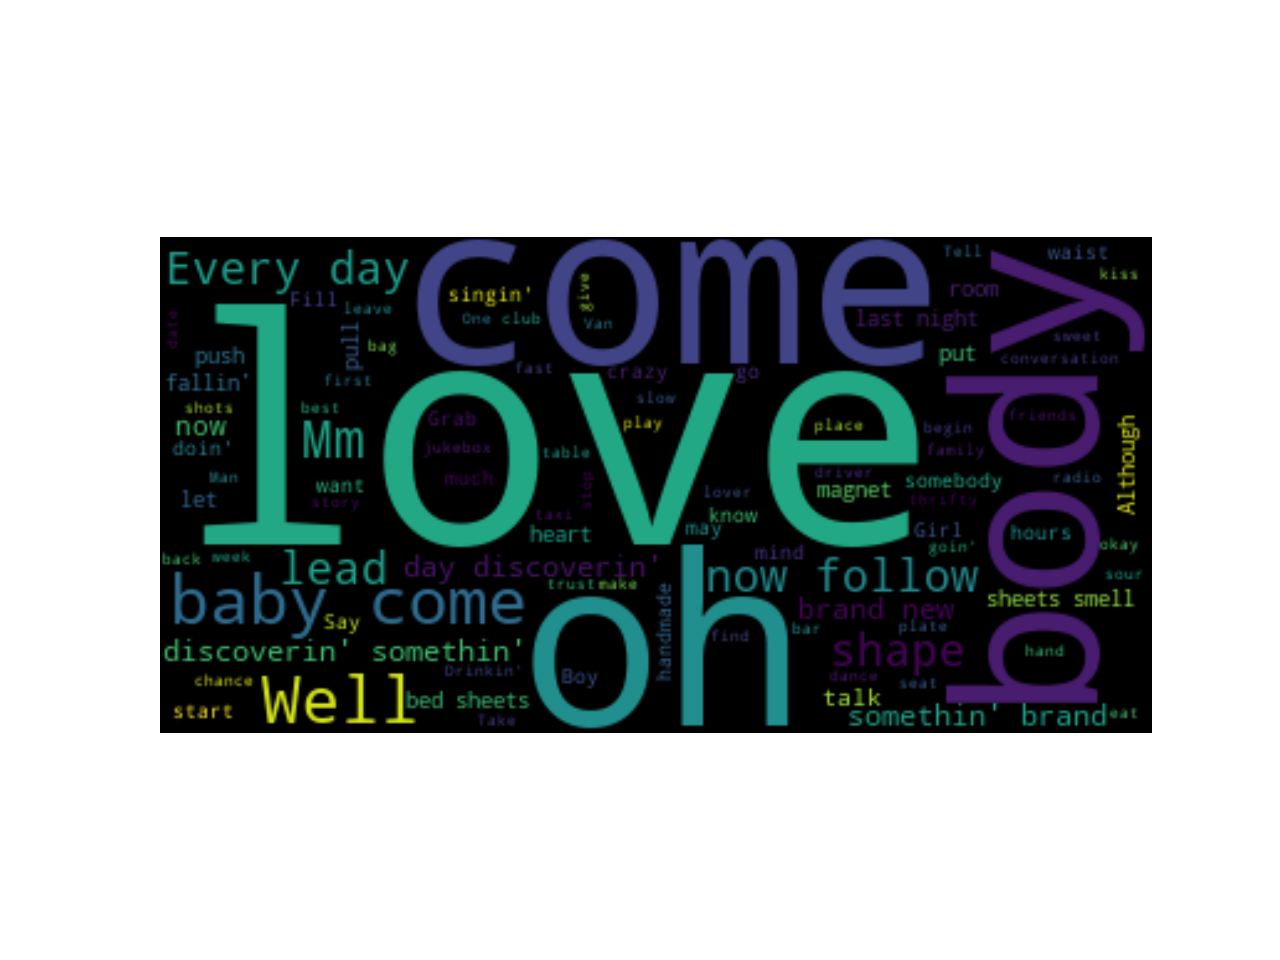

In [91]:
wordcloud = WordCloud().generate(df.iloc[0,5])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
client_id = credentials['client_id']
client_secret = credentials['client_secret']

client_creds = f"{client_id}:{client_secret}"
base64_client_creds = b64encode(client_creds.encode()).decode()

auth_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {base64_client_creds}'
}
payload = {
    'grant_type': 'client_credentials'
}

response = requests.post(auth_url, headers=headers, data=payload)

response.json()


{'access_token': 'BQANa2Tpjzl96kugHFfgjAvIKnNB3U5shqf-3qG9Vta2VtLq-2GDst6y2u11pBCHqBf0tmM7HFIc5vgseuOl6MTyMxbi2ffWvon2g0likw4umn8m38E',
 'token_type': 'Bearer',
 'expires_in': 3600}

In [93]:
def get_release_date(song):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    result = sp.search(song)
    release_date = result['tracks']['items'][0]['album']['release_date']
    return release_date

In [94]:
def get_popularity(song):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    result = sp.search(song)
    popularity = result['tracks']['items'][0]['popularity']
    return popularity

In [95]:
def get_explicitness(song):
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    result = sp.search(song)
    explicitness = result['tracks']['items'][0]['explicit']
    return explicitness

In [96]:
[get_release_date('Shape of You'), get_popularity('Shape of You'), get_explicitness('Shape of You')]

['2017-03-03', 89, False]

In [97]:
df['release_date'] = df['Song'].apply(lambda x: get_release_date(x))
df['popularity'] = df['Song'].apply(lambda x: get_popularity(x))
df['explicitness'] = df['Song'].apply(lambda x: get_explicitness(x))
df

,Artist,Song,like_count,view_count,comment_count,lyrics,sentiment_positive,sentiment_neutral,sentiment_negative,sentiment_compound,lexical_richness,song_length,sentiment_compound_absolute,release_date,popularity,explicitness
1,Ed Sheeran,Shape of You,32323299,6149151955,1146136,A club isn't the best place to find a lover So...,0.229,0.757,0.014,0.9995,23,699,0.9995,2017-03-03,89,False
4,Maroon 5,Sugar,15906928,3972703093,418290,"I'm hurting, baby, I'm broken down I need your...",0.288,0.642,0.070,0.9988,29,472,0.9988,2020-08-25,73,True
5,OneRepublic,Counting Stars,17490906,3927278630,488707,"Lately, I've been, I've been losin' sleep Drea...",0.040,0.856,0.104,-0.9831,21,517,0.9831,2014-01-01,78,False
6,Katy Perry,Roar,16595850,3918599134,774322,I used to bite my tongue and hold my breath Sc...,0.175,0.779,0.047,0.9945,31,352,0.9945,2013-01-01,82,False
8,Justin Bieber,Sorry,16306693,3741548245,868546,You gotta go and get angry at all of my honest...,0.133,0.723,0.145,0.9039,35,359,0.9039,2015-11-13,86,False
9,Ed Sheeran,Thinking Out Loud,14912750,3699993663,372173,When your legs don't work like they used to be...,0.188,0.789,0.023,0.9967,44,326,0.9967,2014-06-21,85,False
11,Ed Sheeran,Perfect,20501323,3611596720,508475,"I found a love for me Oh, darlin', just dive r...",0.251,0.700,0.049,0.9974,52,297,0.9974,2017-03-03,90,False
12,Alan Walker,Faded,27565139,3555488824,1264810,You were the shadow to my light Did you feel u...,0.041,0.883,0.076,-0.8263,44,179,0.8263,2015-12-04,73,False
15,Taylor Swift,Shake It Off,13070777,3373072126,574307,I stay out too late Got nothin' in my brain Th...,0.101,0.470,0.429,-0.9997,27,557,0.9997,2014-10-27,75,False
16,Taylor Swift,Blank Space,15193621,3319525781,641033,"Nice to meet you, where you been? I could show...",0.158,0.662,0.181,-0.8890,40,519,0.8890,2014-10-27,78,False


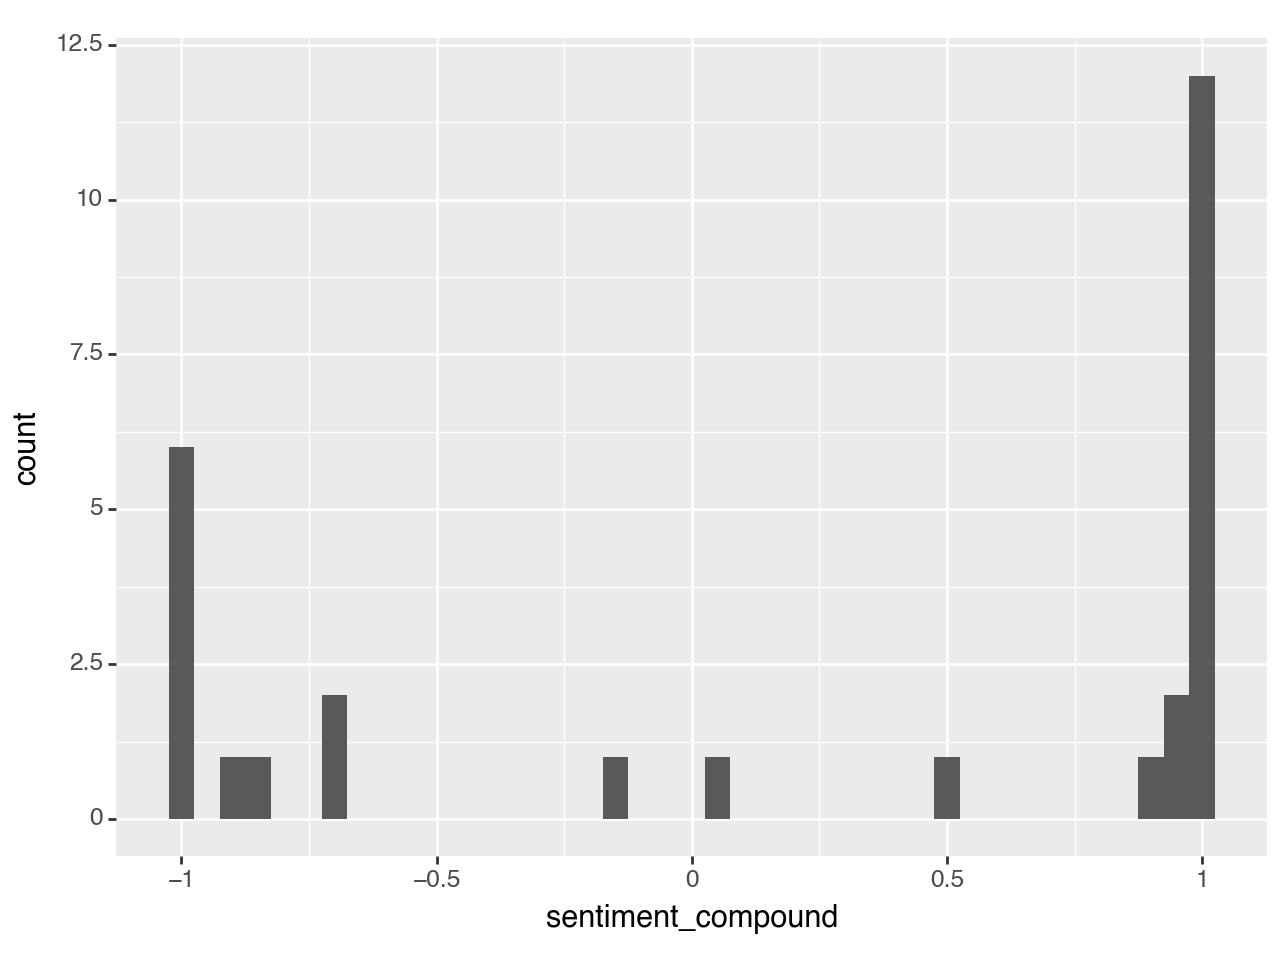

<Figure Size: (640 x 480)>

In [99]:
g = p9.ggplot(
    mapping = p9.aes(x = 'sentiment_compound'),
    data = df
) + \
geom_histogram(binwidth=0.05)

g

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Assume you have a DataFrame named 'data' with columns 'Var1', 'Var2', 'Var3', ... containing your variables

# Step 1: Normalization using Min-Max Scaling
scaler = MinMaxScaler()  # Create an instance of MinMaxScaler
scaled_data = scaler.fit_transform(data)  # Fit and transform the data

# Convert the scaled data back to a DataFrame for readability (optional)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Step 2: Running Linear Regression
# Assuming 'target' is the column you want to predict, and 'features' are the predictors
target = 'like_count'
features = ['view_count', 'comment_count', 'lexical_richness', 'sentiment_compound_absolute', 'song_length']  # Update with your column names

X = scaled_df[features]  # Independent variables
y = scaled_df[target]  # Dependent variable

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model with the scaled data
model.fit(X, y)

# Obtain coefficients (slope) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


NameError: name 'data' is not defined